## Load extrated data

In [17]:
%run twitter_api.ipynb

## Packages

In [18]:
import pandas as pd
import nltk
import re
import plotly

from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk import FreqDist
import numpy as np

## Text Mining 

### Putting all the tweet_texts together

In [19]:
def get_all_text(tweets):
    txt = ''
    for t in tweets:
        txt += t
    return txt

In [20]:
all_text = get_all_text(df_tweets.tweet_text)
#print(all_text)
#type(all_text)

### Regular expressions 

In [21]:
sub_text = re.sub('[-|0-9]','', all_text)
sub_text = re.sub(r'[-./*_~ºª¿{}æ·?#!$&%@,":"";()\']','',sub_text)
sub_text = re.sub(r'http\S+','',sub_text)
sub_text = sub_text.lower()
sub_text = re.sub('ai','ia',sub_text)
type(sub_text)
#print(sub_text)

str

### Stopwords

In [22]:
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')
my_stopwords = ['pra','pro','tb','vc','aí','tá','ah','eh','oh','msm','q','r','lá','ue','ué','pq']
#stopwords.update([])

In [23]:
s = pd.read_csv('../portuguese_stopwords.txt', header=None)
stop = s.values.tolist()
stopwords2 = []
for i in stop:
    stopwords2.append(i[0])

In [24]:
def RemoveStopWords(text):
    stopwords = set(nltk_stopwords + my_stopwords + stopwords2 + list(punctuation))
    word = [i for i in text.split() if not i in stopwords]
    return (" ".join(word))

In [25]:
clean_txt = RemoveStopWords(sub_text)
#type(clean_txt)
#print(clean_txt)

### Tokenization - splitting up a larger body of text into words

In [26]:
words = word_tokenize(clean_txt)
#words = clean_w.split()
#print(words)
#type(words)

## Word Frequency

In [61]:
freq_all_words = FreqDist(words)
freq_df = pd.DataFrame(data = freq_all_words.most_common(10), columns = ['Word', 'Frequency'])
freq_df


,Word,Frequency
0,datascience,97
1,machinelearning,71
2,ia,55
3,bigdata,34
4,deeplearning,23
5,dados,23
6,data,21
7,python,21
8,analytics,15
9,artificial,14


In [62]:
import plotly.express as px

plot_freq = px.bar(freq_df, y= 'Word', x= 'Frequency', orientation='h', title='Most Common Words',text='Frequency')
plot_freq['layout']['yaxis']['autorange'] = "reversed"
plot_freq.show()

## WordCloud generate

In [63]:
words_str = ' '.join(words) # word list into a string
#print(words_str)

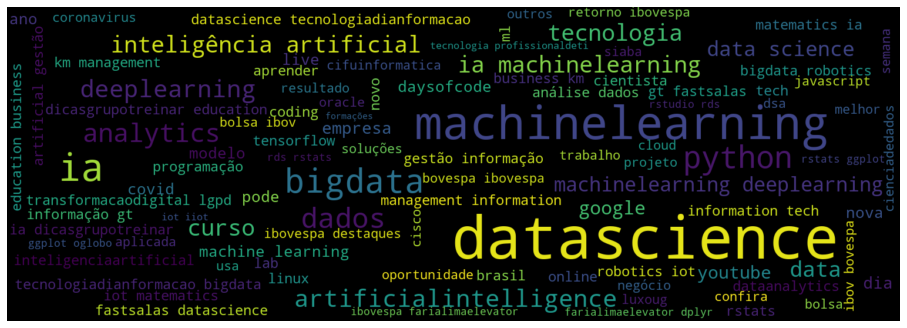

In [64]:
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, max_words=100).generate(words_str)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud.to_file("wordcloud.png")